In [456]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import pandas_ta as ta ## Technical Analysis Indicators
import yfinance as yf
from pytrends.request import TrendReq


data = yf.download(tickers = 'BTC-USD', start = '2021-11-01',end = '2022-07-01')
data.to_csv('modules/data/currencies/bitcoin/btc_dates_daily.csv')



[*********************100%%**********************]  1 of 1 completed


In [457]:
column_names = ['Day', 'volume']
dfT = pd.read_csv('multiTimeline-5.csv', names=column_names)
gTrends = dfT['volume'].tolist()
gTrends = gTrends[2:]


In [458]:
print(len(gTrends))

30


In [459]:
start = '2022-06-01'
end = '2022-07-01'

In [460]:
import datetime
def utc_timestamp_to_date(utc_timestamp):
    return datetime.datetime.utcfromtimestamp(utc_timestamp).date()
file_path_comment = 'modules/data/currencies/bitcoin/reddit-r-bitcoin-data-for-jun-2022-comments.csv'
file_path_post = 'modules/data/currencies/bitcoin/reddit-r-bitcoin-data-for-jun-2022-posts.csv'
dfC = pd.read_csv(file_path_comment)
dfC = dfC.sort_values(by='created_utc', ascending=True)
dfC.head()  
dfC['Date'] = dfC['created_utc'].apply(utc_timestamp_to_date)
dfC.drop(['created_utc','subreddit.id','subreddit.name', 'subreddit.nsfw','permalink','type'], axis=1, inplace=True)
dfC.head()
dfC['sScore'] = (dfC['score']+1)*dfC['sentiment']
dfC.drop(['score','sentiment','id','body'], axis=1, inplace=True)

# Group the DataFrame by 'date' and calculate the mean of the 'score' column
result_df = dfC.groupby('Date')['sScore'].mean().reset_index()
sScore = result_df['sScore'].tolist()
result_df.head(30)



,Date,sScore
0,2022-06-01,0.558157
1,2022-06-02,0.820446
2,2022-06-03,0.406440
3,2022-06-04,0.421344
4,2022-06-05,0.481970
5,2022-06-06,1.107757
6,2022-06-07,0.684169
7,2022-06-08,0.387445
8,2022-06-09,0.625369
9,2022-06-10,0.584213


In [461]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15) ## Relative Strength Index
data['EMAF']=ta.ema(data.Close, length=20) ## Exponential Moving Average Fast
data['EMAM']=ta.ema(data.Close, length=100) ## Exponential Moving Average Medium
data['EMAS']=ta.ema(data.Close, length=200) ## Exponential Moving Average Slow

In [462]:
data = data[start:end]
print(data.shape)
data.head(30)

(30, 10)


,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS
Date,,,,,,,,,,
2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341,43.201783,30672.972990,37436.754528,42842.813404
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061,45.891784,30653.403018,37298.749256,42719.675841
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,43.378761,30563.020885,37148.365917,42590.170515
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958,43.932795,30493.486902,37003.505484,42463.232640
2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109,29906.662109,17264085441,44.268063,30437.598827,36862.973932,42338.291640
2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875,31370.671875,31947336829,50.556580,30526.462926,36754.215475,42229.161095
2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,31155.478516,40770974039,49.673866,30586.369173,36643.349397,42118.975199
2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,30242059107,45.917231,30550.939296,36516.042587,42000.521271
2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,21692004719,45.516113,30509.135368,36389.229823,41882.227508


In [463]:
print(len(gTrends))

30


In [464]:
data['gTrends'] = gTrends ## Google Trends
data['sScore'] = sScore ## Reddit Sentiment Score


data.head(30)




/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_2299/1784750438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gTrends'] = gTrends ## Google Trends
/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_2299/1784750438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sScore'] = sScore ## Reddit Sentiment Score


,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,gTrends,sScore
Date,,,,,,,,,,,,
2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341,43.201783,30672.972990,37436.754528,42842.813404,32,0.558157
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061,45.891784,30653.403018,37298.749256,42719.675841,31,0.820446
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,43.378761,30563.020885,37148.365917,42590.170515,30,0.406440
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958,43.932795,30493.486902,37003.505484,42463.232640,26,0.421344
2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109,29906.662109,17264085441,44.268063,30437.598827,36862.973932,42338.291640,26,0.481970
2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875,31370.671875,31947336829,50.556580,30526.462926,36754.215475,42229.161095,30,1.107757
2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,31155.478516,40770974039,49.673866,30586.369173,36643.349397,42118.975199,32,0.684169
2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,30242059107,45.917231,30550.939296,36516.042587,42000.521271,30,0.387445
2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,21692004719,45.516113,30509.135368,36389.229823,41882.227508,28,0.625369


In [465]:
data['Target'] = data['Adj Close']-data.Open ## Target is the difference between the opening price and the future closing price
data['Target'] = data['Target'].shift(-1) ## Shift the target by one day




/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_2299/3999670778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Adj Close']-data.Open ## Target is the difference between the opening price and the future closing price
/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_2299/3999670778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Target'].shift(-1) ## Shift the target by one day


In [466]:
data.head(30)




,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,gTrends,sScore,Target
Date,,,,,,,,,,,,,
2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341,43.201783,30672.972990,37436.754528,42842.813404,32,0.558157,672.597656
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061,45.891784,30653.403018,37298.749256,42719.675841,31,0.820446,-763.416016
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,43.378761,30563.020885,37148.365917,42590.170515,30,0.406440,126.775391
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958,43.932795,30493.486902,37003.505484,42463.232640,26,0.421344,71.544922
2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109,29906.662109,17264085441,44.268063,30437.598827,36862.973932,42338.291640,26,0.481970,1460.388672
2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875,31370.671875,31947336829,50.556580,30526.462926,36754.215475,42229.161095,30,1.107757,-216.263672
2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,31155.478516,40770974039,49.673866,30586.369173,36643.349397,42118.975199,32,0.684169,-937.125000
2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,30242059107,45.917231,30550.939296,36516.042587,42000.521271,30,0.387445,-103.281250
2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,21692004719,45.516113,30509.135368,36389.229823,41882.227508,28,0.625369,-1026.525391


In [467]:
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))] ## TargetClass is 1 if the price goes up and 0 if it goes down
data['TargetNextClose'] = data['Adj Close'].shift(-1) ## TargetNextClose is the future closing price



/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_2299/1520549629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))] ## TargetClass is 1 if the price goes up and 0 if it goes down
/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_2299/1520549629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TargetNextClose'] = data['Adj Close'].shift(-1) ## TargetNextClose is the future closing price


In [468]:
data.dropna(inplace=True) ## Drop the NaN values
data.reset_index(inplace = True) ## Reset the index
data.drop(['Volume', 'Close','Date'], axis=1, inplace=True)

data.head(30)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,gTrends,sScore,Target,TargetClass,TargetNextClose
0,31792.554688,31957.285156,29501.587891,29799.080078,43.201783,30672.972990,37436.754528,42842.813404,32,0.558157,672.597656,1,30467.488281
1,29794.890625,30604.734375,29652.705078,30467.488281,45.891784,30653.403018,37298.749256,42719.675841,31,0.820446,-763.416016,0,29704.390625
2,30467.806641,30633.035156,29375.689453,29704.390625,43.378761,30563.020885,37148.365917,42590.170515,30,0.406440,126.775391,1,29832.914062
3,29706.138672,29930.564453,29500.005859,29832.914062,43.932795,30493.486902,37003.505484,42463.232640,26,0.421344,71.544922,1,29906.662109
4,29835.117188,30117.744141,29574.449219,29906.662109,44.268063,30437.598827,36862.973932,42338.291640,26,0.481970,1460.388672,1,31370.671875
5,29910.283203,31693.291016,29894.187500,31370.671875,50.556580,30526.462926,36754.215475,42229.161095,30,1.107757,-216.263672,0,31155.478516
6,31371.742188,31489.683594,29311.683594,31155.478516,49.673866,30586.369173,36643.349397,42118.975199,32,0.684169,-937.125000,0,30214.355469
7,31151.480469,31253.691406,29944.404297,30214.355469,45.917231,30550.939296,36516.042587,42000.521271,30,0.387445,-103.281250,0,30111.998047
8,30215.279297,30609.310547,30020.265625,30111.998047,45.516113,30509.135368,36389.229823,41882.227508,28,0.625369,-1026.525391,0,29083.804688
9,30110.330078,30245.808594,28978.146484,29083.804688,41.604502,30373.389589,36244.567940,41754.880017,28,0.584213,-723.855469,0,28360.810547


In [469]:
data_set = data.iloc[:, 0:13]#.values
pd.set_option('display.max_columns', None)

data_set.head(30)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,gTrends,sScore,Target,TargetClass,TargetNextClose
0,31792.554688,31957.285156,29501.587891,29799.080078,43.201783,30672.972990,37436.754528,42842.813404,32,0.558157,672.597656,1,30467.488281
1,29794.890625,30604.734375,29652.705078,30467.488281,45.891784,30653.403018,37298.749256,42719.675841,31,0.820446,-763.416016,0,29704.390625
2,30467.806641,30633.035156,29375.689453,29704.390625,43.378761,30563.020885,37148.365917,42590.170515,30,0.406440,126.775391,1,29832.914062
3,29706.138672,29930.564453,29500.005859,29832.914062,43.932795,30493.486902,37003.505484,42463.232640,26,0.421344,71.544922,1,29906.662109
4,29835.117188,30117.744141,29574.449219,29906.662109,44.268063,30437.598827,36862.973932,42338.291640,26,0.481970,1460.388672,1,31370.671875
5,29910.283203,31693.291016,29894.187500,31370.671875,50.556580,30526.462926,36754.215475,42229.161095,30,1.107757,-216.263672,0,31155.478516
6,31371.742188,31489.683594,29311.683594,31155.478516,49.673866,30586.369173,36643.349397,42118.975199,32,0.684169,-937.125000,0,30214.355469
7,31151.480469,31253.691406,29944.404297,30214.355469,45.917231,30550.939296,36516.042587,42000.521271,30,0.387445,-103.281250,0,30111.998047
8,30215.279297,30609.310547,30020.265625,30111.998047,45.516113,30509.135368,36389.229823,41882.227508,28,0.625369,-1026.525391,0,29083.804688
9,30110.330078,30245.808594,28978.146484,29083.804688,41.604502,30373.389589,36244.567940,41754.880017,28,0.584213,-723.855469,0,28360.810547


In [470]:
from sklearn.preprocessing import MinMaxScaler ## Scale the data
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


sc = MinMaxScaler(feature_range=(0,1)) ## Scale the data between 0 and 1
data_set_scaled = sc.fit_transform(data_set) ## Fit and transform the data
print(data_set_scaled) ## Print the scaled data

[[1.         1.         0.95787096 0.87277681 0.75013881 1.
  1.         1.         0.08108108 0.23699698 0.84984675 1.
  0.92688566]
 [0.84370847 0.88333169 0.97014529 0.92688566 0.84152499 0.99763298
  0.97650144 0.97318009 0.06756757 0.60113001 0.60194012 0.
  0.86511153]
 [0.89635549 0.88577286 0.94764499 0.86511153 0.75615121 0.98670114
  0.95089523 0.94497325 0.05405405 0.02637065 0.75561857 1.
  0.87551573]
 [0.83676477 0.82517915 0.95774246 0.87551573 0.77497313 0.9782909
  0.92622943 0.91732561 0.         0.0470611  0.74608384 1.
  0.88148577]
 [0.84685568 0.84132489 0.96378904 0.88148577 0.78636303 0.97153116
  0.90230071 0.8901129  0.         0.1312286  0.98584728 1.
  1.        ]
 [0.85273645 0.9772284  0.98975944 1.         1.         0.9822794
  0.88378209 0.86634378 0.05405405 1.         0.69639792 0.
  0.98257971]
 [0.96707683 0.95966563 0.94244618 0.98257971 0.97001194 0.98952514
  0.8649046  0.8423448  0.08108108 0.41193814 0.57195182 0.
  0.9063941 ]
 [0.94984418 0.9

In [524]:
# multiple feature from data provided to the model
X = []

backcandles = 15 ## Number of previous candles(days) to consider
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

29
[[[1.         1.         0.95787096 ... 1.         1.         1.        ]
  [0.84370847 0.88333169 0.97014529 ... 0.99763298 0.97650144 0.97318009]
  [0.89635549 0.88577286 0.94764499 ... 0.98670114 0.95089523 0.94497325]
  ...
  [0.60451306 0.55476254 0.36003602 ... 0.81631541 0.69374013 0.66066561]
  [0.27203713 0.22899727 0.26334385 ... 0.7362857  0.6484532  0.61931951]
  [0.2492501  0.19654018 0.20060312 ... 0.66809442 0.60529725 0.57917811]]

 [[0.84370847 0.88333169 0.97014529 ... 0.99763298 0.97650144 0.97318009]
  [0.89635549 0.88577286 0.94764499 ... 0.98670114 0.95089523 0.94497325]
  [0.83676477 0.82517915 0.95774246 ... 0.9782909  0.92622943 0.91732561]
  ...
  [0.27203713 0.22899727 0.26334385 ... 0.7362857  0.6484532  0.61931951]
  [0.2492501  0.19654018 0.20060312 ... 0.66809442 0.60529725 0.57917811]
  [0.2789469  0.21605605 0.20765739 ... 0.58115684 0.55560776 0.53468737]]

 [[0.89635549 0.88577286 0.94764499 ... 0.98670114 0.95089523 0.94497325]
  [0.83676477 0.825

In [525]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

11
(11, 15, 8)
(3, 15, 8)
(11, 1)
(3, 1)
[[0.11769096]
 [0.        ]
 [0.12431193]
 [0.12805722]
 [0.13704777]
 [0.0784736 ]
 [0.1674273 ]
 [0.1792284 ]
 [0.20114057]
 [0.16268498]
 [0.13906192]]


In [526]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [527]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1 = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 15, 8)]           0         
                                                                 
 first_layer (LSTM)          (None, 15, 400)           654400    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4498401 (17.16 MB)
Trainable params: 4498401 (17.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [528]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [529]:
model1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=14, shuffle=True, validation_split = 0.1, callbacks=[cp1])

Epoch 1/14
1/1 [==============================] - ETA: 0s - loss: 0.0235 - root_mean_squared_error: 0.1533INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 6s 6s/step - loss: 0.0235 - root_mean_squared_error: 0.1533 - val_loss: 0.3180 - val_root_mean_squared_error: 0.5640
Epoch 2/14
1/1 [==============================] - ETA: 0s - loss: 1.7754 - root_mean_squared_error: 1.3324INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 1.7754 - root_mean_squared_error: 1.3324 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 3/14
1/1 [==============================] - 0s 171ms/step - loss: 0.0302 - root_mean_squared_error: 0.1739 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 4/14
1/1 [==============================] - 0s 270ms/step - loss: 0.0346 - root_mean_squared_error: 0.1861 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1233
Epoch 5/14
1/1 [==============================] - 0s 195ms/step - loss: 0.0548 - root_mean_squared_error: 0.2340 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 6/14
1/1 [==============================] - 0s 176ms/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 7/14
1/1 [==============================] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1138INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 5s 5s/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 5.1720e-04 - val_root_mean_squared_error: 0.0227
Epoch 8/14
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0660INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 4.5711e-04 - val_root_mean_squared_error: 0.0214
Epoch 9/14
1/1 [==============================] - 0s 151ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 10/14
1/1 [==============================] - 0s 138ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0398
Epoch 11/14
1/1 [==============================] - 0s 193ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 6.6926e-04 - val_root_mean_squared_error: 0.0259
Epoch 12/14
1/1 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1020INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 1.6313e-04 - val_root_mean_squared_error: 0.0128
Epoch 13/14
1/1 [==============================] - 0s 176ms/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - val_loss: 3.2076e-04 - val_root_mean_squared_error: 0.0179
Epoch 14/14
1/1 [==============================] - 0s 132ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 8.2017e-04 - val_root_mean_squared_error: 0.0286


In [530]:
from keras.models import load_model
model1 = load_model('model1/')

In [531]:
y_pred = model1.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(5):
    print(y_pred[i], y_test[i])

1/1 [==============================] - 1s 519ms/step
[0.09483708] [0.1022415]
[0.08851795] [0.08794449]
[0.08293521] [0.06209683]


IndexError: index 3 is out of bounds for axis 0 with size 3

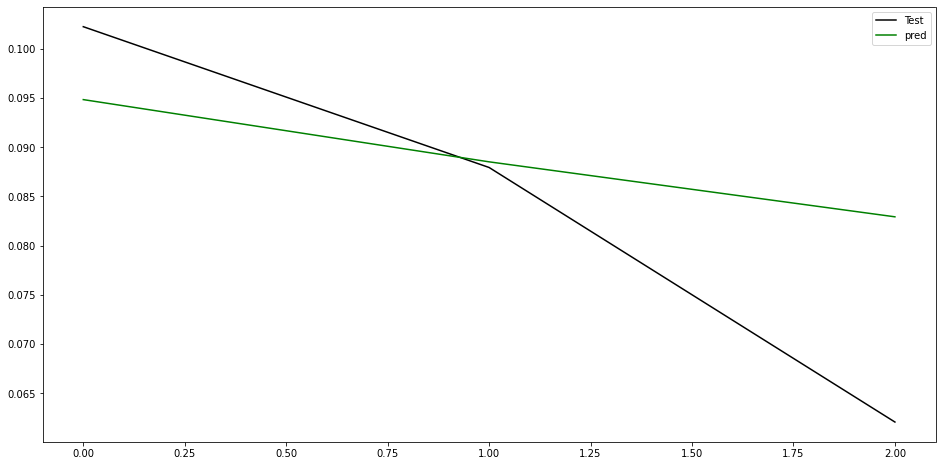

Mean Absolute_error:  9.605414234101772
Mean Squared Error:  0.16313068044837564


In [532]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)





In [537]:
# multiple feature from data provided to the model
X = []

print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

29
[[[1.         1.         0.95787096 ... 1.         1.         0.08108108]
  [0.84370847 0.88333169 0.97014529 ... 0.97650144 0.97318009 0.06756757]
  [0.89635549 0.88577286 0.94764499 ... 0.95089523 0.94497325 0.05405405]
  ...
  [0.60451306 0.55476254 0.36003602 ... 0.69374013 0.66066561 0.95945946]
  [0.27203713 0.22899727 0.26334385 ... 0.6484532  0.61931951 0.97297297]
  [0.2492501  0.19654018 0.20060312 ... 0.60529725 0.57917811 0.82432432]]

 [[0.84370847 0.88333169 0.97014529 ... 0.97650144 0.97318009 0.06756757]
  [0.89635549 0.88577286 0.94764499 ... 0.95089523 0.94497325 0.05405405]
  [0.83676477 0.82517915 0.95774246 ... 0.92622943 0.91732561 0.        ]
  ...
  [0.27203713 0.22899727 0.26334385 ... 0.6484532  0.61931951 0.97297297]
  [0.2492501  0.19654018 0.20060312 ... 0.60529725 0.57917811 0.82432432]
  [0.2789469  0.21605605 0.20765739 ... 0.55560776 0.53468737 0.64864865]]

 [[0.89635549 0.88577286 0.94764499 ... 0.95089523 0.94497325 0.05405405]
  [0.83676477 0.825

In [538]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

11
(11, 15, 9)
(3, 15, 9)
(11, 1)
(3, 1)
[[0.11769096]
 [0.        ]
 [0.12431193]
 [0.12805722]
 [0.13704777]
 [0.0784736 ]
 [0.1674273 ]
 [0.1792284 ]
 [0.20114057]
 [0.16268498]
 [0.13906192]]


In [539]:
lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1_GT = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1_GT.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 15, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 15, 400)           656000    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4500001 (17.17 MB)
Trainable params: 4500001 (17.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [540]:
cp1_GT = ModelCheckpoint('model1/', save_best_only=True)
model1_GT.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [541]:
model1_GT.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=14, shuffle=True, validation_split = 0.1, callbacks=[cp1_GT])

Epoch 1/14
1/1 [==============================] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.1013INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 6s 6s/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.5697 - val_root_mean_squared_error: 0.7548
Epoch 2/14
1/1 [==============================] - ETA: 0s - loss: 2.0895 - root_mean_squared_error: 1.4455INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 5s 5s/step - loss: 2.0895 - root_mean_squared_error: 1.4455 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 3/14
1/1 [==============================] - 0s 313ms/step - loss: 0.0394 - root_mean_squared_error: 0.1984 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983
Epoch 4/14
1/1 [==============================] - 0s 239ms/step - loss: 0.0343 - root_mean_squared_error: 0.1852 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1362
Epoch 5/14
1/1 [==============================] - 0s 165ms/step - loss: 0.0627 - root_mean_squared_error: 0.2505 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1129
Epoch 6/14
1/1 [==============================] - ETA: 0s - loss: 0.0397 - root_mean_squared_error: 0.1994INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0397 - root_mean_squared_error: 0.1994 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 7/14
1/1 [==============================] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1166INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 4.9754e-04 - val_root_mean_squared_error: 0.0223
Epoch 8/14
1/1 [==============================] - 0s 211ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 6.6694e-04 - val_root_mean_squared_error: 0.0258
Epoch 9/14
1/1 [==============================] - 0s 221ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 10/14
1/1 [==============================] - 0s 208ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0436
Epoch 11/14
1/1 [==============================] - 0s 171ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 8.4839e-04 - val_root_mean_squared_error: 0.0291
Epoch 12/14
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.0965INFO:tensorflow:Assets written to: model1/a

INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - val_loss: 2.2476e-04 - val_root_mean_squared_error: 0.0150
Epoch 13/14
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0695INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0048 - root_mean_squared_error: 0.0695 - val_loss: 1.9151e-04 - val_root_mean_squared_error: 0.0138
Epoch 14/14
1/1 [==============================] - 0s 179ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 4.1353e-04 - val_root_mean_squared_error: 0.0203


In [542]:
model1 = load_model('model1/')

In [543]:
y_pred = model1.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(7):
    print(y_pred[i], y_test[i])

1/1 [==============================] - 2s 2s/step
[0.08314093] [0.1022415]
[0.07911182] [0.08794449]
[0.07357255] [0.06209683]


IndexError: index 3 is out of bounds for axis 0 with size 3

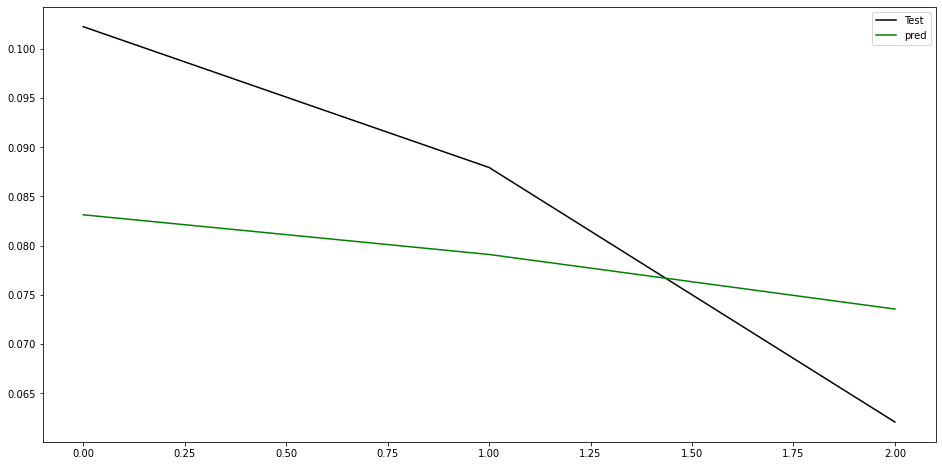

Mean Absolute_error:  13.13631609082222
Mean Squared Error:  0.19151320157106966


In [544]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)







In [545]:
# multiple feature from data provided to the model
X = []

print(data_set_scaled.shape[0])
for j in range(10):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

29
[[[1.         1.         0.95787096 ... 1.         0.08108108 0.23699698]
  [0.84370847 0.88333169 0.97014529 ... 0.97318009 0.06756757 0.60113001]
  [0.89635549 0.88577286 0.94764499 ... 0.94497325 0.05405405 0.02637065]
  ...
  [0.60451306 0.55476254 0.36003602 ... 0.66066561 0.95945946 0.15147885]
  [0.27203713 0.22899727 0.26334385 ... 0.61931951 0.97297297 0.21506135]
  [0.2492501  0.19654018 0.20060312 ... 0.57917811 0.82432432 0.13794747]]

 [[0.84370847 0.88333169 0.97014529 ... 0.97318009 0.06756757 0.60113001]
  [0.89635549 0.88577286 0.94764499 ... 0.94497325 0.05405405 0.02637065]
  [0.83676477 0.82517915 0.95774246 ... 0.91732561 0.         0.0470611 ]
  ...
  [0.27203713 0.22899727 0.26334385 ... 0.61931951 0.97297297 0.21506135]
  [0.2492501  0.19654018 0.20060312 ... 0.57917811 0.82432432 0.13794747]
  [0.2789469  0.21605605 0.20765739 ... 0.53468737 0.64864865 0.15522039]]

 [[0.89635549 0.88577286 0.94764499 ... 0.94497325 0.05405405 0.02637065]
  [0.83676477 0.825

In [546]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

11
(11, 15, 10)
(3, 15, 10)
(11, 1)
(3, 1)
[[0.11769096]
 [0.        ]
 [0.12431193]
 [0.12805722]
 [0.13704777]
 [0.0784736 ]
 [0.1674273 ]
 [0.1792284 ]
 [0.20114057]
 [0.16268498]
 [0.13906192]]


In [547]:
lstm_input = Input(shape=(backcandles, 10), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1_GT2 = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1_GT2.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 15, 10)]          0         
                                                                 
 first_layer (LSTM)          (None, 15, 400)           657600    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4501601 (17.17 MB)
Trainable params: 4501601 (17.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [548]:
cp1_GT2 = ModelCheckpoint('model1/', save_best_only=True)
model1_GT2.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [549]:
model1_GT2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=14, shuffle=True, validation_split = 0.1, callbacks=[cp1_GT2])

Epoch 1/14
1/1 [==============================] - ETA: 0s - loss: 0.0463 - root_mean_squared_error: 0.2152INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 6s 6s/step - loss: 0.0463 - root_mean_squared_error: 0.2152 - val_loss: 0.3641 - val_root_mean_squared_error: 0.6034
Epoch 2/14
1/1 [==============================] - ETA: 0s - loss: 1.3578 - root_mean_squared_error: 1.1652INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 1.3578 - root_mean_squared_error: 1.1652 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 3/14
1/1 [==============================] - 0s 154ms/step - loss: 0.0201 - root_mean_squared_error: 0.1417 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1029
Epoch 4/14
1/1 [==============================] - 0s 160ms/step - loss: 0.0379 - root_mean_squared_error: 0.1947 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1271
Epoch 5/14
1/1 [==============================] - 0s 237ms/step - loss: 0.0557 - root_mean_squared_error: 0.2360 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 6/14
1/1 [==============================] - 0s 154ms/step - loss: 0.0315 - root_mean_squared_error: 0.1776 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0577
Epoch 7/14
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0983INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 2.4104e-04 - val_root_mean_squared_error: 0.0155
Epoch 8/14
1/1 [==============================] - 0s 158ms/step - loss: 0.0057 - root_mean_squared_error: 0.0758 - val_loss: 7.9949e-04 - val_root_mean_squared_error: 0.0283
Epoch 9/14
1/1 [==============================] - 0s 181ms/step - loss: 0.0155 - root_mean_squared_error: 0.1243 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 10/14
1/1 [==============================] - 0s 329ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0394
Epoch 11/14
1/1 [==============================] - 0s 191ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 7.5799e-04 - val_root_mean_squared_error: 0.0275
Epoch 12/14
1/1 [==============================] - 0s 216ms/step - loss: 0.0065 - root_mean_squared_error: 0.0803 - val_loss: 2.8272e-04 - val_root_me

INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 0.0036 - root_mean_squared_error: 0.0603 - val_loss: 1.5796e-04 - val_root_mean_squared_error: 0.0126
Epoch 14/14
1/1 [==============================] - 0s 251ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 1.7038e-04 - val_root_mean_squared_error: 0.0131


In [550]:
model1 = load_model('model1/')

In [551]:
y_pred = model1.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(7):
    print(y_pred[i], y_test[i])

1/1 [==============================] - 1s 533ms/step
[0.09042113] [0.1022415]
[0.08700991] [0.08794449]
[0.0803532] [0.06209683]


IndexError: index 3 is out of bounds for axis 0 with size 3

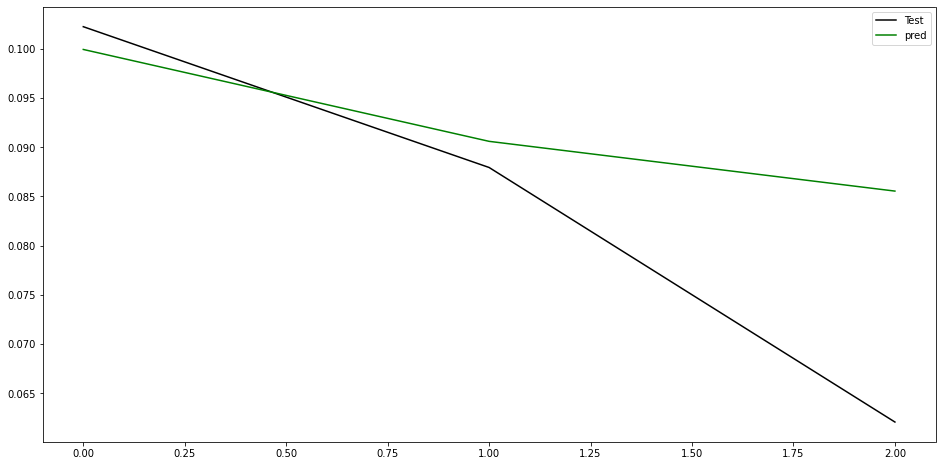

Mean Absolute_error:  9.47247538715601
Mean Squared Error:  0.18744794942904264


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)





